<a href="https://colab.research.google.com/github/nitishmcfc/AI-ML/blob/main/Data%20Cleaning/Russian%20Housing%20Dataset/Russian_Dataset_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


# <u>Russian Housing Market </u>
### Data Cleaning Project that takes the Russian Housing Market Dataset and converts it in a form that is suitable for analysis.

In [ ]:
from google.colab import files
files.upload()

In [1]:
# Load Russian Housing Market Dataset
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collision Data from SWITRS    1GB  2020-11-22 16:51:55            375  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51           1400  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57            600  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44           2539  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Tu

In [ ]:
!mkdir data
!cd data
!kaggle competitions download -c sberbank-russian-housing-market

  0% 0.00/18.6k [00:00<?, ?B/s]
100% 18.6k/18.6k [00:00<00:00, 7.67MB/s]
  0% 0.00/4.46M [00:00<?, ?B/s]
100% 4.46M/4.46M [00:00<00:00, 73.0MB/s]
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 30.8MB/s]
 53% 9.00M/17.1M [00:00<00:00, 46.1MB/s]
100% 17.1M/17.1M [00:00<00:00, 67.6MB/s]
  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 57.2MB/s]


In [ ]:
!unzip train.csv.zip -d data

Archive:  train.csv.zip
  inflating: data/train.csv          
   creating: data/__MACOSX/
  inflating: data/__MACOSX/._train.csv  


In [ ]:
#Loading the train dataset into a dataframe
df=pd.read_csv('./data/train.csv')

In [ ]:
df.shape

(30471, 292)

####  Using a heatmap to check the distribution of null and non-null values across various columns in the dataset.

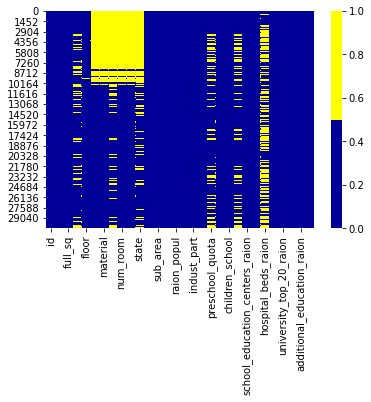

In [ ]:
#Heatmap of first 30 columns to show what percentage of them are null
cols=df.columns[:30]
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours))

#### Inference 1: Out of the first 30 columns, material, number of rooms and states seem to have the highest number of null entries

In [ ]:
#Alternatively, calculating the percentage of missing entries in each of the columns
#Missin Column Percentage
missing_dict={}
for col in df.columns:
  missing=np.mean(df[col].isnull())
  if missing!=0.0:
    print(col," percentage missing: ",round(missing,2))

life_sq  percentage missing:  0.21
floor  percentage missing:  0.01
max_floor  percentage missing:  0.31
material  percentage missing:  0.31
build_year  percentage missing:  0.45
num_room  percentage missing:  0.31
kitch_sq  percentage missing:  0.31
state  percentage missing:  0.44
preschool_quota  percentage missing:  0.22
school_quota  percentage missing:  0.22
hospital_beds_raion  percentage missing:  0.47
raion_build_count_with_material_info  percentage missing:  0.16
build_count_block  percentage missing:  0.16
build_count_wood  percentage missing:  0.16
build_count_frame  percentage missing:  0.16
build_count_brick  percentage missing:  0.16
build_count_monolith  percentage missing:  0.16
build_count_panel  percentage missing:  0.16
build_count_foam  percentage missing:  0.16
build_count_slag  percentage missing:  0.16
build_count_mix  percentage missing:  0.16
raion_build_count_with_builddate_info  percentage missing:  0.16
build_count_before_1920  percentage missing:  0.16
bui

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

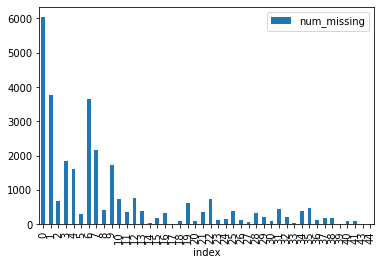

In [ ]:
#Creating Histogram of Missing values

for col in df.columns:
  missing=df[col].isnull()
  num_missing=np.sum(missing)

  if num_missing>0:
    print('created missing indicator for: {}'.format(col))
    df['{}_ismissing'.format(col)]=missing

#plotting hist
ismissingcols=[col for col in df.columns if 'ismissing' in col]
df['num_missing']=df[ismissingcols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',y='num_missing')

#### Ways to deal with the missing rows
Method 1: Drop all rows where the missing percentage is greater than a particular threshold. (In this case, I have considered it as 35%)

In [ ]:
ind_missing=df[df['num_missing'] >35].index
df_less_missing_rows=df.drop(ind_missing,axis=0)

In [ ]:
df_less_hos_beds_raion =df_less_missing_rows.drop('hospital_beds_raion',axis=1)

In [ ]:
##Replacing Missing Data with Average/Median


Method 2: Replace the missing entries with median

In [ ]:
life_sq_med=df['life_sq'].median()
df['life_sq']=df['life_sq'].fillna(life_sq_med)

In [ ]:
#Applying Imputation across all features

In [ ]:
df_numeric=df.select_dtypes(include='number')
numeric_cols=df_numeric.columns.values
#print(numeric_cols)

for col in numeric_cols:
  missing=df[col].isnull()
  num_missing=np.sum(missing)

  if num_missing>0:
    print('Imputing for {}'.format(col))
    df['{}_missing'.format(col)]=missing
    med=df[col].median()
    df[col]=df[col].fillna(med)
    

Imputing for floor
Imputing for max_floor
Imputing for material
Imputing for build_year
Imputing for num_room
Imputing for kitch_sq
Imputing for state
Imputing for preschool_quota
Imputing for school_quota
Imputing for hospital_beds_raion
Imputing for raion_build_count_with_material_info
Imputing for build_count_block
Imputing for build_count_wood
Imputing for build_count_frame
Imputing for build_count_brick
Imputing for build_count_monolith
Imputing for build_count_panel
Imputing for build_count_foam
Imputing for build_count_slag
Imputing for build_count_mix
Imputing for raion_build_count_with_builddate_info
Imputing for build_count_before_1920
Imputing for build_count_1921-1945
Imputing for build_count_1946-1970
Imputing for build_count_1971-1995
Imputing for build_count_after_1995
Imputing for metro_min_walk
Imputing for metro_km_walk
Imputing for railroad_station_walk_km
Imputing for railroad_station_walk_min
Imputing for ID_railroad_station_walk
Imputing for cafe_sum_500_min_price

In [ ]:
#Dealing with Outliers

#Check for outliers
#Methods
#1. Boxplots

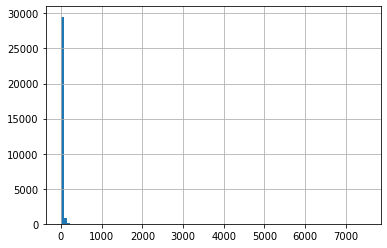

In [ ]:
df['life_sq'].hist(bins=100)

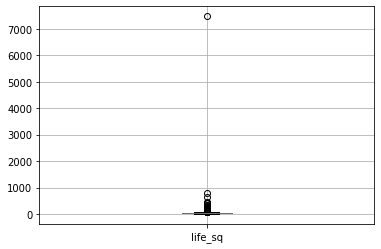

In [ ]:
df.boxplot(column=['life_sq'])

In [ ]:
df['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

#Options for Categorical Variables:
  #1. Replace with mode
  #2. Replace with _MISSING_
  

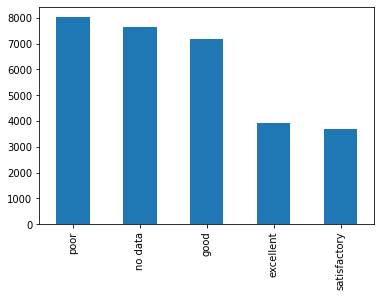

In [ ]:
df['ecology'].value_counts().plot.bar()


In [ ]:
#Note: Look at scatter plots

In [ ]:
#Repetitive/ Uninformative Data

##Find out columns with more than 95% of the rows having the same value

threshold=0.95
num_rows=len(df)
low_information_cols=[]
for col in df.columns:
  counts=df[col].value_counts()
  top_count=(counts/num_rows).iloc[0]

  if top_count>threshold:
    low_information_cols.append(col)
  
print('columns exceeding threshold are: \n',low_information_cols)

columns exceeding threshold are: 
 ['oil_chemistry_raion', 'railroad_terminal_raion', 'nuclear_reactor_raion', 'build_count_foam', 'big_road1_1line', 'railroad_1line', 'cafe_count_500_price_high', 'mosque_count_500', 'cafe_count_1000_price_high', 'mosque_count_1000', 'mosque_count_1500', 'floor_ismissing', 'metro_min_walk_ismissing', 'metro_km_walk_ismissing', 'railroad_station_walk_km_ismissing', 'railroad_station_walk_min_ismissing', 'ID_railroad_station_walk_ismissing', 'cafe_sum_3000_min_price_avg_ismissing', 'cafe_sum_3000_max_price_avg_ismissing', 'cafe_avg_price_3000_ismissing', 'prom_part_5000_ismissing', 'cafe_sum_5000_min_price_avg_ismissing', 'cafe_sum_5000_max_price_avg_ismissing', 'cafe_avg_price_5000_ismissing', 'floor_missing', 'metro_min_walk_missing', 'metro_km_walk_missing', 'railroad_station_walk_km_missing', 'railroad_station_walk_min_missing', 'ID_railroad_station_walk_missing', 'cafe_sum_3000_min_price_avg_missing', 'cafe_sum_3000_max_price_avg_missing', 'cafe_avg

In [ ]:
#Removing Key Based Duplicates

main_features=['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(main_features)['id'].count().head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2011-08-20  43       27.0     4.0    1979.0      2.0       5850000      1
2011-08-23  34       19.0     3.0    1979.0      2.0       6000000      1
2011-08-27  43       29.0     2.0    1979.0      2.0       5700000      1
2011-09-01  89       50.0     9.0    1979.0      2.0       13100000     1
2011-09-05  77       77.0     4.0    1979.0      2.0       16331452     1
2011-09-06  67       46.0     14.0   1979.0      2.0       9100000      1
2011-09-08  25       14.0     10.0   1979.0      2.0       5500000      1
2011-09-09  44       44.0     5.0    1979.0      2.0       2000000      1
2011-09-10  42       27.0     5.0    1979.0      2.0       5300000      1
2011-09-13  36       21.0     9.0    1979.0      2.0       2000000      1
2011-09-16  36       19.0     12.0   1979.0      2.0       4650000      1
            38       19.0     11.0   1979.0      2.0       4800000      1
2011-09-17  43       28.0     4.0    1979.0

In [ ]:
#Drop common rows

df=df.drop_duplicates(subset=main_features)

#### Miscellaneous Cleaning:
1. Check Captilizations
2. Convert timestamp into appropriate pandas datatype


In [ ]:
#cHECK Capitalization

df['sub_area'].value_counts()

Poselenie Sosenskoe               1772
Nekrasovka                        1609
Poselenie Vnukovskoe              1370
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [ ]:
df['sub_area']=df['sub_area'].str.lower()
df['sub_area'].value_counts()

poselenie sosenskoe               1772
nekrasovka                        1609
poselenie vnukovskoe              1370
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie mihajlovo-jarcevskoe       1
poselenie klenovskoe                 1
Name: sub_area, Length: 146, dtype: int64

In [ ]:
#what is the data type of timestamp

type(df['timestamp'][0])

str

In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [ ]:
type(df['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp